<a href="https://colab.research.google.com/github/TAneKAnz/Amulet_Project/blob/main/Augmentation_FirstModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Upload Dataset**

เปลี่ยน PATH '.../CEPP.zip'

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/colab_resources/CEPP.zip'

# Set the extraction destination
extracted_folder_name = 'CEPP'
extracted_folder_path = '/content/' + extracted_folder_name

# Create the folder if it does not exist
if not os.path.exists(extracted_folder_path):
    os.makedirs(extracted_folder_path)

# Extract the zip file
shutil.unpack_archive(zip_file_path, extracted_folder_path, 'zip')

# Remove the __MACOSX folder if it exists
macosx_folder_path = os.path.join(extracted_folder_path, '__MACOSX')
if os.path.exists(macosx_folder_path):
    shutil.rmtree(macosx_folder_path)

# Display the extracted files
extracted_files = os.listdir(extracted_folder_path)
print(f"Files extracted to {extracted_folder_path}: {extracted_files}")


Mounted at /content/drive
Files extracted to /content/CEPP: ['LPtim_sema8round', 'Nangpraya', 'LP_Toh_prapidta', 'LPOpasee', 'LPDoem', 'LPJong', 'PraPongSuPanNaKae', 'Sumkor', 'LPKoon', 'LPtim_kunphan', 'LPSod', 'LPtim_nangpraya', 'Rod', 'LPNGoen', 'LP_Guay_gen3', 'LPtim_Charoenporn', 'LPYasotorn', 'Somded', 'LPtim_nakprok8round', 'LPParn', 'LP_taud_blocktaoread']


# **Augmentation**

### DEMO  [*ไม่ต้องrun]


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

#Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

#Function to perform image augmentation
def augment_images(input_folder, output_folder):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # Create an ImageDataGenerator
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        shear_range=0.2,
        rotation_range=30
    )

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:
        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Load the image
        img = image.load_img(input_file_path)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Generate augmented images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix=file.split('.')[0], save_format='jpeg'):
            i += 1
            if i >= 3:  # Generate 3 augmented images per original image
                break

#Set the main folder path
main_folder = '/content/CEPP'

#Set the subfolder name
subfolder_name = 'A'

#Set the output folder name
output_folder_name = 'B'

#Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

#Perform image augmentation
augment_images(subfolder_path, output_folder_path)

In [ ]:
import os
import cv2
import numpy as np

#Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

#Function to perform image augmentation
def augment_images(input_folder, output_folder):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # Create an ImageDataGenerator
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        shear_range=0.2,
        rotation_range=30
    )

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:

        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Flip left-right
        flip_lr = cv2.flip(original_image, 1)
        cv2.imwrite(os.path.join(output_folder, f"flip_lr_{file}"), flip_lr)

        # # Skew
        # skew_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
        # skewed_image = cv2.warpAffine(original_image, skew_matrix, (original_image.shape[1], original_image.shape[0]))
        # cv2.imwrite(os.path.join(output_folder, f"skew_{file}"), skewed_image)


        # Rotate
        rotation_angle = 30
        rotation_matrix = cv2.getRotationMatrix2D((original_image.shape[1] / 2, original_image.shape[0] / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(original_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))
        cv2.imwrite(os.path.join(output_folder, f"rotate_{file}"), rotated_image)

#Set the main folder path
main_folder = '/content/CEPP'

#Set the subfolder name
subfolder_name = 'A'

#Set the output folder name
output_folder_name = 'B'

#Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

#Perform image augmentation
augment_images(subfolder_path, output_folder_path)

In [ ]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation
def augment_images(input_folder, output_folder):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # Create an ImageDataGenerator without saturation_range
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        shear_range=0.2,
        rotation_range=30,
        brightness_range=[0.5, 1.5]  # Adjust brightness
    )

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:

        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Flip left-right
        flip_lr = cv2.flip(original_image, 1)
        cv2.imwrite(os.path.join(output_folder, f"flip_lr_{file}"), flip_lr)

        # Rotate
        rotation_angle = 30
        rotation_matrix = cv2.getRotationMatrix2D((original_image.shape[1] / 2, original_image.shape[0] / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(original_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))
        cv2.imwrite(os.path.join(output_folder, f"rotate_{file}"), rotated_image)

        # Apply color jittering using ImageDataGenerator for brightness
        augmented_image = datagen.apply_transform(original_image, {'brightness': np.random.uniform(0.1, 2.0)})

        # Apply color jittering using ImageDataGenerator for saturation
        augmented_image = datagen.apply_transform(augmented_image, {'saturation': np.random.uniform(0.1, 2.0)})

        cv2.imwrite(os.path.join(output_folder, f"color_jitter_{file}"), augmented_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Set the subfolder name
subfolder_name = 'A'

# Set the output folder name
output_folder_name = 'B'

# Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

# Perform image augmentation
augment_images(subfolder_path, output_folder_path)


In [ ]:
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation
def augment_images(input_folder, output_folder):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:

        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Flip left-right
        flip_lr = cv2.flip(original_image, 1)
        cv2.imwrite(os.path.join(output_folder, f"flip_lr_{file}"), flip_lr)

        # Rotate
        rotation_angle = 30
        rotation_matrix = cv2.getRotationMatrix2D((original_image.shape[1] / 2, original_image.shape[0] / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(original_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))
        cv2.imwrite(os.path.join(output_folder, f"rotate_{file}"), rotated_image)

        # Adjust brightness
        brightness_factor = np.random.uniform(0.5, 1.5)
        brightened_image = cv2.convertScaleAbs(original_image, alpha=brightness_factor, beta=0)
        cv2.imwrite(os.path.join(output_folder, f"brightness_{file}"), brightened_image)

        # Adjust contrast
        contrast_factor = np.random.uniform(0.7, 1.3)
        contrasted_image = cv2.convertScaleAbs(original_image, alpha=contrast_factor, beta=0)
        cv2.imwrite(os.path.join(output_folder, f"contrast_{file}"), contrasted_image)

        # Adjust saturation
        saturation_factor = np.random.uniform(0.5, 1.5)
        hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
        saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
        cv2.imwrite(os.path.join(output_folder, f"saturation_{file}"), saturated_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Set the subfolder name
subfolder_name = 'A'

# Set the output folder name
output_folder_name = 'B'

# Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

# Perform image augmentation
augment_images(subfolder_path, output_folder_path)


In [ ]:
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation
def augment_images(input_folder, output_folder):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:

        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Combine augmentations: brightness, contrast, and saturation
        brightness_factor = np.random.uniform(0.5, 1.5)
        contrast_factor = np.random.uniform(0.7, 1.3)
        saturation_factor = np.random.uniform(0.5, 1.5)

        augmented_image = original_image.copy()

        # Adjust brightness
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=brightness_factor, beta=0)

        # Adjust contrast
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

        # Adjust saturation
        hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
        augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

        # Write the augmented image
        cv2.imwrite(os.path.join(output_folder, f"augmented_{file}"), augmented_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Set the subfolder name
subfolder_name = 'A'

# Set the output folder name
output_folder_name = 'B'

# Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

# Perform image augmentation
augment_images(subfolder_path, output_folder_path)


In [ ]:
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation
def augment_images(input_folder, output_folder):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:

        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Randomly decide to flip horizontally
        if np.random.choice([True, False]):
            original_image = cv2.flip(original_image, 1)

        # Randomly decide to rotate the image
        rotation_angle = np.random.uniform(-30, 30)
        rows, cols, _ = original_image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(original_image, rotation_matrix, (cols, rows))

        # Combine augmentations: brightness, contrast, and saturation
        brightness_factor = np.random.uniform(0.5, 1.5)
        contrast_factor = np.random.uniform(0.7, 1.3)
        saturation_factor = np.random.uniform(0.5, 1.5)

        augmented_image = rotated_image.copy()

        # Adjust brightness
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=brightness_factor, beta=0)

        # Adjust contrast
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

        # Adjust saturation
        hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
        augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

        # Write the augmented image
        cv2.imwrite(os.path.join(output_folder, f"augmented_{file}"), augmented_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Set the subfolder name
subfolder_name = 'A'

# Set the output folder name
output_folder_name = 'B'

# Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

# Perform image augmentation
augment_images(subfolder_path, output_folder_path)


In [ ]:
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation
def augment_images(input_folder, output_folder):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:

        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Randomly decide to flip horizontally
        if np.random.choice([True, False]):
            original_image = cv2.flip(original_image, 1)

        # Randomly decide to rotate the image
        rotation_angle = np.random.uniform(-30, 30)
        rows, cols, _ = original_image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
        rotated_image = cv2.warpAffine(original_image, rotation_matrix, (cols, rows))

        # Combine augmentations: brightness, contrast, saturation, and noise injection
        brightness_factor = np.random.uniform(0.5, 1.5)
        contrast_factor = np.random.uniform(0.7, 1.3)
        saturation_factor = np.random.uniform(0.5, 1.5)

        augmented_image = rotated_image.copy()

        # Adjust brightness
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=brightness_factor, beta=0)

        # Adjust contrast
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

        # Adjust saturation
        hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
        augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

        # Add random noise
        noise = np.random.normal(0, 0.5, augmented_image.shape).astype(np.uint8)
        noisy_image = cv2.add(augmented_image, noise)

        # Write the augmented image with noise
        cv2.imwrite(os.path.join(output_folder, f"augmented_{file}"), noisy_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Set the subfolder name
subfolder_name = 'A'

# Set the output folder name
output_folder_name = 'B'

# Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

# Perform image augmentation
augment_images(subfolder_path, output_folder_path)


In [ ]:
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation
def augment_images(input_folder, output_folder, num_augmentations=5):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:

        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        for i in range(num_augmentations):
            # Randomly decide to flip horizontally
            if np.random.choice([True, False]):
                original_image = cv2.flip(original_image, 1)

            # Randomly decide to rotate the image
            rotation_angle = np.random.uniform(-30, 30)
            rows, cols, _ = original_image.shape
            rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
            rotated_image = cv2.warpAffine(original_image, rotation_matrix, (cols, rows))

            # Combine augmentations: brightness, contrast, saturation, and noise injection
            brightness_factor = np.random.uniform(0.5, 1.5)
            contrast_factor = np.random.uniform(0.7, 1.3)
            saturation_factor = np.random.uniform(0.5, 1.5)

            augmented_image = rotated_image.copy()

            # Adjust brightness
            augmented_image = cv2.convertScaleAbs(augmented_image, alpha=brightness_factor, beta=0)

            # Adjust contrast
            augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

            # Adjust saturation
            hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
            hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
            augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

            # Add random noise with reduced standard deviation
            noise = np.random.normal(0, 0.5, augmented_image.shape).astype(np.uint8)
            noisy_image = cv2.add(augmented_image, noise)

            # Write the augmented image with noise
            output_file_name = f"{os.path.splitext(file)[0]}_{i+1}.jpg"
            cv2.imwrite(os.path.join(output_folder, output_file_name), noisy_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Set the subfolder name
subfolder_name = 'A'

# Set the output folder name
output_folder_name = 'B'

# Set the path for subfolder (A) and create the output folder (B)
subfolder_path = os.path.join(main_folder, subfolder_name)
output_folder_path = os.path.join(main_folder, output_folder_name)

# Perform image augmentation
augment_images(subfolder_path, output_folder_path)


In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation for all folders in the specified directory
def augment_images_for_all_folders(main_folder, output_folder_prefix='Aug', num_augmentations=5):
    # List all folders in the main directory
    folders = [folder for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

    # Iterate through each folder
    for folder in folders:
        # Set the input and output folder paths
        input_folder_path = os.path.join(main_folder, folder)
        output_folder_name = f'{output_folder_prefix}{folder}'
        output_folder_path = os.path.join(main_folder, output_folder_name)

        # Perform image augmentation for the current folder
        augment_images(input_folder_path, output_folder_path, num_augmentations)

# Function to perform image augmentation
def augment_images(input_folder, output_folder, num_augmentations=5):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:
        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Check if the image is None
        if original_image is None:
            print(f"Skipping {file} as it could not be read.")
            continue

        for i in range(num_augmentations):
            # Randomly decide to flip horizontally
            if np.random.choice([True, False]):
                original_image = cv2.flip(original_image, 1)

            # Randomly decide to rotate the image
            rotation_angle = np.random.uniform(-30, 30)
            rows, cols, _ = original_image.shape
            rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
            rotated_image = cv2.warpAffine(original_image, rotation_matrix, (cols, rows))

            # Combine augmentations: brightness, contrast, saturation, and noise injection
            brightness_factor = np.random.uniform(0.5, 1.5)
            contrast_factor = np.random.uniform(0.7, 1.3)
            saturation_factor = np.random.uniform(0.5, 1.5)

            augmented_image = rotated_image.copy()

            # Adjust brightness
            augmented_image = cv2.convertScaleAbs(augmented_image, alpha=brightness_factor, beta=0)

            # Adjust contrast
            augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

            # Adjust saturation
            hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
            hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
            augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

            # Add random noise with reduced standard deviation
            noise = np.random.normal(0, 0.5, augmented_image.shape).astype(np.uint8)
            noisy_image = cv2.add(augmented_image, noise)

            # Write the augmented image with noise
            output_file_name = f"{os.path.splitext(file)[0]}_{i+1}.jpg"
            cv2.imwrite(os.path.join(output_folder, output_file_name), noisy_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Perform image augmentation for all folders in the specified directory
augment_images_for_all_folders(main_folder)


Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.


In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation for all folders in the specified directory
def augment_images_for_all_folders(main_folder, output_folder_prefix='Aug', num_augmentations=5):
    # List all folders in the main directory
    folders = [folder for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

    # Iterate through each folder
    for folder in folders:
        # Set the input and output folder paths
        input_folder_path = os.path.join(main_folder, folder)

        # Adjusted output_folder_name to avoid duplication
        output_folder_name = f'{output_folder_prefix}{folder}' if not folder.startswith(output_folder_prefix) else folder
        output_folder_path = os.path.join(main_folder, output_folder_name)

        # Perform image augmentation for the current folder
        augment_images(input_folder_path, output_folder_path, num_augmentations)

# Function to perform image augmentation
def augment_images(input_folder, output_folder, num_augmentations=5):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:
        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Check if the image is None
        if original_image is None:
            print(f"Skipping {file} as it could not be read.")
            continue

        for i in range(num_augmentations):
            # Randomly decide to flip horizontally
            if np.random.choice([True, False]):
                original_image = cv2.flip(original_image, 1)

            # Randomly decide to rotate the image
            rotation_angle = np.random.uniform(-30, 30)
            rows, cols, _ = original_image.shape
            rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
            rotated_image = cv2.warpAffine(original_image, rotation_matrix, (cols, rows))

            # Combine augmentations: brightness, contrast, saturation, and noise injection
            brightness_factor = np.random.uniform(0.5, 1.5)
            contrast_factor = np.random.uniform(0.7, 1.3)
            saturation_factor = np.random.uniform(0.5, 1.5)

            augmented_image = rotated_image.copy()

            # Adjust brightness
            augmented_image = cv2.convertScaleAbs(augmented_image, alpha=brightness_factor, beta=0)

            # Adjust contrast
            augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

            # Adjust saturation
            hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
            hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
            augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

            # Add random noise with reduced standard deviation
            noise = np.random.normal(0, 0.5, augmented_image.shape).astype(np.uint8)
            noisy_image = cv2.add(augmented_image, noise)

            # Write the augmented image with noise
            output_file_name = f"{os.path.splitext(file)[0]}_{i+1}.jpg"
            cv2.imwrite(os.path.join(output_folder, output_file_name), noisy_image)

# Set the main folder path
main_folder = '/content/CEPP'

# Perform image augmentation for all folders in the specified directory
augment_images_for_all_folders(main_folder)


Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.


In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation for all folders in the specified directory
def augment_images_for_all_folders(main_folder, output_folder_prefix='Aug', num_augmentations=5):
    # List all folders in the main directory
    folders = [folder for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

    # Iterate through each folder
    for folder in folders:
        # Set the input and output folder paths
        input_folder_path = os.path.join(main_folder, folder)

        # Adjusted output_folder_name to avoid duplication
        output_folder_name = f'{output_folder_prefix}{folder}' if not folder.startswith(output_folder_prefix) else folder
        output_folder_path = os.path.join(main_folder, output_folder_name)

        # Perform image augmentation for the current folder
        augment_images(input_folder_path, output_folder_path, num_augmentations)

# Function to perform image augmentation
def augment_images(input_folder, output_folder, num_augmentations=5):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:
        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Check if the image is None
        if original_image is None:
            print(f"Skipping {file} as it could not be read.")
            continue

        # Generate augmented versions using each method
        for method in ['original', 'flip', 'rotate', 'brightness_contrast_saturation']:
            for i in range(num_augmentations):
                augmented_image = apply_augmentation(original_image, method)

                # Write the augmented image with noise
                output_file_name = f"{method}_{os.path.splitext(file)[0]}_{i+1}.jpg"
                cv2.imwrite(os.path.join(output_folder, output_file_name), augmented_image)

def apply_augmentation(image, method):
    # Method: original (no augmentation)
    if method == 'original':
        return image

    # Method: flip horizontally
    elif method == 'flip':
        return cv2.flip(image, 1)

    # Method: rotate
    elif method == 'rotate':
        rotation_angle = np.random.uniform(-30, 30)
        rows, cols, _ = image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
        return cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Method: brightness, contrast, saturation
    elif method == 'brightness_contrast_saturation':
        # Adjust brightness
        brightness_factor = np.random.uniform(0.5, 1.5)
        augmented_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

        # Adjust contrast
        contrast_factor = np.random.uniform(0.7, 1.3)
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

        # Adjust saturation
        hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
        saturation_factor = np.random.uniform(0.5, 1.5)
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
        augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

        return augmented_image

# Set the main folder path
main_folder = '/content/CEPP'

# Perform image augmentation for all folders in the specified directory
augment_images_for_all_folders(main_folder)


Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.


### Latest Version

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np

# Function to create a new folder if it does not exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to perform image augmentation for all folders in the specified directory
def augment_images_for_all_folders(main_folder, output_folder_prefix='Aug', num_augmentations=5):
    # List all folders in the main directory
    folders = [folder for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

    # Iterate through each folder
    for folder in folders:
        # Set the input and output folder paths
        input_folder_path = os.path.join(main_folder, folder)

        # Adjusted output_folder_name to avoid duplication
        output_folder_name = f'{output_folder_prefix}{folder}' if not folder.startswith(output_folder_prefix) else folder
        output_folder_path = os.path.join(main_folder, output_folder_name)

        # Perform image augmentation for the current folder
        augment_images(input_folder_path, output_folder_path, num_augmentations)

# Function to perform image augmentation
def augment_images(input_folder, output_folder, num_augmentations=5):
    # Create an output folder if it does not exist
    create_folder(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Iterate through each file in the input folder
    for file in files:
        # Construct the full path of the input file
        input_file_path = os.path.join(input_folder, file)

        # Read the image using OpenCV
        original_image = cv2.imread(input_file_path)

        # Check if the image is None
        if original_image is None:
            print(f"Skipping {file} as it could not be read.")
            continue

        # Generate augmented versions using each method
        for method in ['original', 'flip', 'rotate', 'color', 'skew', 'noise']:
            for i in range(num_augmentations):
                augmented_image = apply_augmentation(original_image, method)

                # Write the augmented image with noise
                output_file_name = f"{method}_{os.path.splitext(file)[0]}_{i+1}.jpg"
                cv2.imwrite(os.path.join(output_folder, output_file_name), augmented_image)

def apply_augmentation(image, method):
    # Method: original (no augmentation)
    if method == 'original':
        return image

    # Method: flip horizontally
    elif method == 'flip':
        return cv2.flip(image, 1)

    # Method: rotate
    elif method == 'rotate':
        rotation_angle = np.random.uniform(-30, 30)
        rows, cols, _ = image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
        return cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Method: brightness, contrast, saturation
    elif method == 'color':
        # Adjust brightness
        brightness_factor = np.random.uniform(0.5, 1.5)
        augmented_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

        # Adjust contrast
        contrast_factor = np.random.uniform(0.7, 1.3)
        augmented_image = cv2.convertScaleAbs(augmented_image, alpha=contrast_factor, beta=0)

        # Adjust saturation
        hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2HSV)
        saturation_factor = np.random.uniform(0.5, 1.5)
        hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
        augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

        return augmented_image

    # Method: skew
    elif method == 'skew':
        skew_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
        return cv2.warpAffine(image, skew_matrix, (image.shape[1], image.shape[0]))

    # Method: noise
    elif method == 'noise':
        noise = np.random.normal(0, 2, image.shape).astype(np.uint8)
        return cv2.add(image, noise)

# Set the main folder path
main_folder = '/content/CEPP'

# Perform image augmentation for all folders in the specified directory
augment_images_for_all_folders(main_folder)


Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.
Skipping .DS_Store as it could not be read.


# **MODEL**

## **Train Model**

**# rearrange folder for image gen**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your original dataset
original_dataset_path = '/content/CEPP'

# Set the path to create the new dataset structure
new_dataset_path = '/content'

# Create the 'dataset' folder
dataset_path = os.path.join(new_dataset_path, 'dataset')
os.makedirs(dataset_path, exist_ok=True)

# Create train and validation directories within 'dataset'
train_path = os.path.join(dataset_path, 'train')
validation_path = os.path.join(dataset_path, 'validation')

os.makedirs(train_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)

# List all 'Aug' folders
aug_folders = [folder for folder in os.listdir(original_dataset_path) if folder.startswith('Aug')]

# Loop through each 'Aug' folder
for aug_folder in aug_folders:
    aug_folder_path = os.path.join(original_dataset_path, aug_folder)

    # Extract class name from folder name
    class_name = aug_folder[3:]  # Assuming the class name follows 'Aug' in the folder name

    # Create corresponding 'train' and 'validation' folders
    train_class_path = os.path.join(train_path, f'train{class_name}')
    validation_class_path = os.path.join(validation_path, f'valid{class_name}')

    os.makedirs(train_class_path, exist_ok=True)
    os.makedirs(validation_class_path, exist_ok=True)

    # List all images in the 'Aug' folder
    images = [img for img in os.listdir(aug_folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Split the images into train and validation sets
    train_images, validation_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move images to the respective directories
    for img in train_images:
        src = os.path.join(aug_folder_path, img)
        dest = os.path.join(train_class_path, img)
        shutil.copy(src, dest)

    for img in validation_images:
        src = os.path.join(aug_folder_path, img)
        dest = os.path.join(validation_class_path, img)
        shutil.copy(src, dest)

print("Dataset rearranged successfully.")


Dataset rearranged successfully.


**# training space**


### mobilenet v2

Found 7950 images belonging to 21 classes.
Found 1986 images belonging to 21 classes.
Epoch 1/10
249/249 [==============================] - 634s 3s/step - loss: 0.8193 - accuracy: 0.7932 - val_loss: 0.1370 - val_accuracy: 0.9804
Epoch 2/10
249/249 [==============================] - 613s 2s/step - loss: 0.2642 - accuracy: 0.9390 - val_loss: 0.0648 - val_accuracy: 0.9935
Epoch 3/10
249/249 [==============================] - 600s 2s/step - loss: 0.1787 - accuracy: 0.9599 - val_loss: 0.0354 - val_accuracy: 0.9975
Epoch 4/10
249/249 [==============================] - 617s 2s/step - loss: 0.1405 - accuracy: 0.9679 - val_loss: 0.0292 - val_accuracy: 0.9970
Epoch 5/10
249/249 [==============================] - 597s 2s/step - loss: 0.1116 - accuracy: 0.9756 - val_loss: 0.0235 - val_accuracy: 0.9975
Epoch 6/10
249/249 [==============================] - 605s 2s/step - loss: 0.0984 - accuracy: 0.9769 - val_loss: 0.0214 - val_accuracy: 0.9980
Epoch 7/10
249/249 [==============================] - 60

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


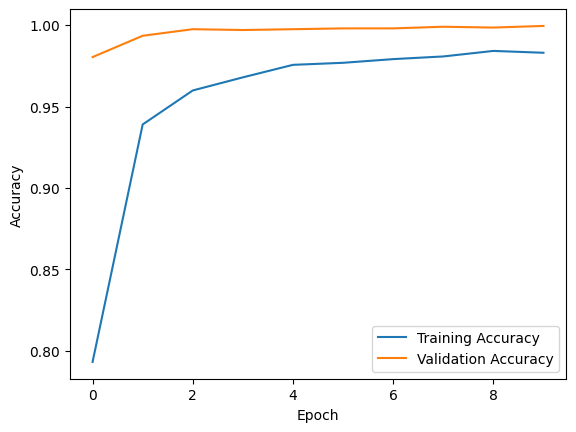

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have a dataset with three classes and the data is organized in directories
# such as 'class1', 'class2', and 'class3' in a parent directory 'data'

data_dir = '/content/dataset/train'
batch_size = 32
image_size = (224, 224)

# Create a data generator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80:20 split
)

# Load the MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the model by adding custom layers on top of the base model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(21, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create train and test generators using flow_from_directory
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # specify this is the training set
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # specify this is the validation set
)

# Save model history callback
history_callback = tf.keras.callbacks.CSVLogger('training_history.csv')

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=test_generator,
    callbacks=[history_callback]
)

# Save the entire model
model.save('mobilenetv2_model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### manual model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

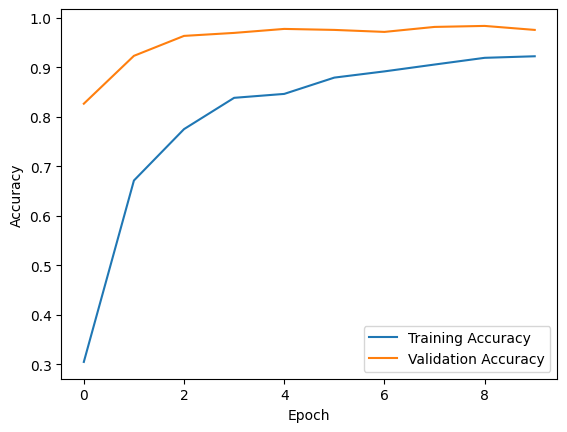

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Define your CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Optional dropout for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Define image dimensions and number of classes
input_shape = (128, 128, 3)  # adjust the input size according to your images

# Get the list of class names dynamically from the folder names
class_names = sorted(os.listdir('/content/dataset/train'))

# Get the number of classes
num_classes = len(class_names)

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Set up data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

# Set up data generators for training and validation
batch_size = 32
train_generator = datagen.flow_from_directory('/content/dataset/train',
                                              target_size=(128, 128),
                                              batch_size=batch_size,
                                              class_mode='sparse',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/dataset/validation',
                                                   target_size=(128, 128),
                                                   batch_size=batch_size,
                                                   class_mode='sparse',
                                                   subset='validation')

# Calculate steps_per_epoch for training
steps_per_epoch_train = len(train_generator)

# Calculate steps_per_epoch for validation
steps_per_epoch_validation = len(validation_generator)

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch_train,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=steps_per_epoch_validation)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

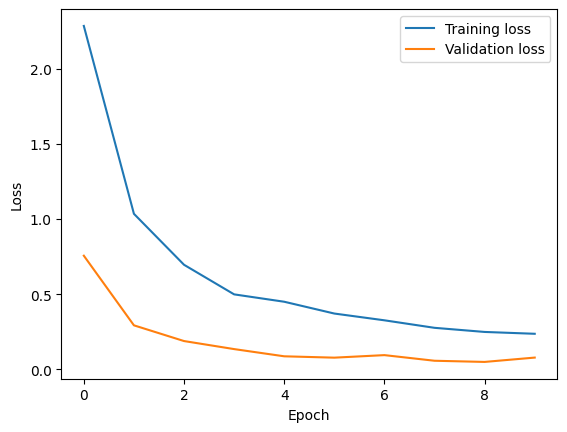

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**# testing accuracy**

In [ ]:
test_generator = datagen.flow_from_directory('/content/dataset/validation',
                                            target_size=(128, 128),
                                            batch_size=batch_size,
                                            class_mode='sparse')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Found 2484 images belonging to 21 classes.
78/78 [==============================] - 55s 696ms/step - loss: 0.0710 - accuracy: 0.9835
Test Accuracy: 98.35%


In [ ]:
# Save the model architecture and weights
model.save('your_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Testing**

** extract file zip**

In [ ]:
import os
import zipfile

# Path to the zip file containing test images
zip_file_path = '/content/Test.zip'

# Temporary directory to extract the contents
extract_path = '/content/test_dataset'

# Create an empty folder for extraction
os.makedirs(extract_path, exist_ok=True)

# Extract images from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the content to the specified location
    zip_ref.extractall(extract_path)

print("Test dataset extracted successfully.")


Test dataset extracted successfully.


In [ ]:
# Path to the zip file
zip_file_path = '/content/manual1_3.h5.zip'

# Directory to extract the contents
extract_path = '/content'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to the specified location
    zip_ref.extractall(extract_path)

print("Contents extracted successfully.")


Contents extracted successfully.


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('/content/manual1_3.h5')

# Path to the folder containing images for prediction
test_dataset_path = '/content/test_dataset/Test'

# List all image files in the folder
image_files = [f for f in os.listdir(test_dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Define a function to preprocess an image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    return img_array

# Loop through each image file and make predictions
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(test_dataset_path, image_file)

    # Preprocess the image for prediction
    img_array = preprocess_image(image_path)

    # Get predictions
    predictions = model.predict(img_array)

    # Map predicted class index to class name
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]

    print(f"Image: {image_file}, Predicted Class: {predicted_class_name}")


1/1 [==============================] - 0s 94ms/step
Image: LPJong25.jpg, Predicted Class: trainLPJong
1/1 [==============================] - 0s 28ms/step
Image: nangpraya_praykhu (3).jpg, Predicted Class: trainNangpraya
1/1 [==============================] - 0s 30ms/step
Image: Sumkor 1 (16).jpg, Predicted Class: trainPraPongSuPanNaKae
1/1 [==============================] - 0s 29ms/step
Image: chareunporn (5).jpg, Predicted Class: trainLPtim_Charoenporn
1/1 [==============================] - 0s 29ms/step
Image: kunphan (4).jpg, Predicted Class: trainLPtim_kunphan
1/1 [==============================] - 0s 31ms/step
Image: Somded 1 (38).jpg, Predicted Class: trainSomded
1/1 [==============================] - 0s 29ms/step
Image: sema8round (2).jpg, Predicted Class: trainLPtim_kunphan
1/1 [==============================] - 0s 29ms/step
Image: LPNGoen21.jpeg, Predicted Class: trainLPNGoen
1/1 [==============================] - 0s 29ms/step
Image: Somded 1 (43).png, Predicted Class: trainSom

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('/content/manual1_3.h5')

# Path to the folder containing images for prediction
test_dataset_path = '/content/test_dataset/Test'

# List all image files in the folder
image_files = [f for f in os.listdir(test_dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Define a function to preprocess an image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    return img_array

# Initialize variables for accuracy calculation
total_images = len(image_files)
correct_predictions = 0

# Loop through each image file and make predictions
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(test_dataset_path, image_file)

    # Preprocess the image for prediction
    img_array = preprocess_image(image_path)

    # Get predictions
    predictions = model.predict(img_array)

    # Map predicted class index to class name
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]

    # Get the ground truth class (extracted from the folder name)
    true_class_name = image_file.split('_')[0]  # Adjust this based on your folder naming convention

    # Check if the prediction is correct
    if predicted_class_name == true_class_name:
        correct_predictions += 1

    print(f"Image: {image_file}, Predicted Class: {predicted_class_name}, True Class: {true_class_name}")

# Calculate accuracy
accuracy = correct_predictions / total_images
print(f"Total Correct Predictions: {correct_predictions}/{total_images}")
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 [==============================] - 0s 93ms/step
Image: LPJong25.jpg, Predicted Class: trainLPJong, True Class: LPJong25.jpg
1/1 [==============================] - 0s 30ms/step
Image: nangpraya_praykhu (3).jpg, Predicted Class: trainNangpraya, True Class: nangpraya
1/1 [==============================] - 0s 30ms/step
Image: Sumkor 1 (16).jpg, Predicted Class: trainPraPongSuPanNaKae, True Class: Sumkor 1 (16).jpg
1/1 [==============================] - 0s 30ms/step
Image: chareunporn (5).jpg, Predicted Class: trainLPtim_Charoenporn, True Class: chareunporn (5).jpg
1/1 [==============================] - 0s 44ms/step
Image: kunphan (4).jpg, Predicted Class: trainLPtim_kunphan, True Class: kunphan (4).jpg
1/1 [==============================] - 0s 31ms/step
Image: Somded 1 (38).jpg, Predicted Class: trainSomded, True Class: Somded 1 (38).jpg
1/1 [==============================] - 0s 29ms/step
Image: sema8round (2).jpg, Predicted Class: trainLPtim_kunphan, True Class: sema8round (2).jpg
1/1